# Introduction

The dataset is part of the SPSS v23 package. It contains information about a test taken by some students. It includes features such as school setting, school type, gender, and pre-test scores. The goal of the project is to predict students' test scores using machine learning algorithms. The following algorithms were used in this project: Linear Regression, Support Vector Machine, Decision Tree.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from scipy import stats


In [ ]:
pip install ydata_profiling > NUL 2>&1

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
# Import libraries to visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Machine Learning models and metrics from Scikit-learn library

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Preliminary data analysis

In this section, we will take a preliminary look at our data. To do this, we will load the data, display the first and last records, as well as random rows from our dataset. We will also check basic statistics such as the mean, median, maximum, and minimum values. We generate a complete and exhaustive report for the dataset using ydata_profiling library.

In [ ]:
# Data import

In [ ]:
test_scores = pd.read_csv('test_scores.csv')

In [ ]:
# Shape of data

In [ ]:
test_scores.shape

(2133, 11)

The dataset contains 2,133 rows and 11 columns.

## Manual review of examples



In [ ]:
# Display type of data

In [ ]:
test_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


We have 3 columns of type float and 8 columns of type object

In [ ]:
# numerical variable statistics

In [ ]:
test_scores.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [ ]:
# Display the first 5 rows

In [ ]:
test_scores.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
# Display the last 5 rows

In [ ]:
test_scores.tail()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


In [ ]:
# Display 10 random samples. We can see that the data is diverse.

In [ ]:
test_scores.sample(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
192,CIMBB,Urban,Non-public,HUJ,Experimental,17.0,4LM4Y,Male,Does not qualify,73.0,81.0
1714,VHDHF,Rural,Non-public,J6X,Standard,16.0,LNO77,Male,Qualifies for reduced/free lunch,47.0,56.0
1667,UUUQX,Suburban,Non-public,SSP,Standard,15.0,07N4F,Male,Does not qualify,68.0,72.0
1338,QOQTS,Urban,Public,X2O,Experimental,25.0,3TPE1,Male,Does not qualify,63.0,76.0
55,CCAAW,Suburban,Non-public,2B1,Experimental,18.0,QJVAM,Male,Qualifies for reduced/free lunch,55.0,72.0
469,FBUMG,Rural,Non-public,5LQ,Experimental,18.0,39KCW,Male,Qualifies for reduced/free lunch,66.0,81.0
500,GJJHK,Suburban,Public,HCB,Standard,22.0,40S5U,Male,Qualifies for reduced/free lunch,38.0,49.0
2101,ZOWMK,Urban,Public,QA2,Standard,30.0,WTGZ3,Male,Qualifies for reduced/free lunch,41.0,48.0
290,CUQAM,Urban,Public,OMI,Standard,28.0,AYOIP,Female,Does not qualify,51.0,66.0
83,CCAAW,Suburban,Non-public,IQN,Experimental,15.0,GJ8SE,Male,Qualifies for reduced/free lunch,63.0,77.0


At first glance, the data seems to be fine. There are no visible missing values. The values in the columns are of the appropriate type. The majority of the columns are text data. Three columns are numerical data.

Profiler Report  is used for automated data exploration and generating reports that include detailed descriptive statistics, visualizations, and information about the distributions of variables in the dataset.

In [ ]:
profile = ProfileReport(test_scores, title="Profiling Report")

In [ ]:
%%time
profile

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 22.2 µs


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Below, we will present a description of the report.

**Variable Types**

* Numeric Variables: n_student, prestest, posttest
* Categorical Variables: school, school_setting, school_type, teaching_method, gender, lunch
* Text Variables: classroom, student_id
* Missing Values: There are no missing values in the dataset.
* Duplicate Records: There are no duplicate records.

**Analysis of Key Variables**


1.   School
* Distinct Categories: 23 different schools are represented.
* Top Categories: The most frequent school codes are "GOOBU" (158 occurrences) and "QOQTS" (149 occurrences).

2.   School Setting

* Distinct Categories: 3 (Urban, Suburban, Rural).
* Distribution: Urban (906), Suburban (717), Rural (510).
3. School Type

* Distinct Categories: 2 (Public, Non-public).
* Distribution: Public (1582), Non-public (551).
* Imbalance: A notable imbalance with a much higher representation of public schools.
* Chi-Squared Test: Very significant, suggesting that the distribution is non-random.
4. Classroom

* Distinct Categories: 97 unique classroom identifiers.
* Top Classrooms: "18K" (31 occurrences), "ZBH" (30 occurrences).
* Chi-Squared Test: Significant results indicate that some classrooms are much more common than others.
5. Teaching Method

* Distinct Categories: 2 (Standard, Experimental).
* Distribution: Standard (1373), Experimental (760).
* Chi-Squared Test: Indicates a significant difference in the frequency of teaching methods.
6. Number of Students

* Distinct Values: 18 different student counts.
* Most Common Values: 22 (264 occurrences), 21 (231 occurrences).
* Statistics: Mean = 22.8, Std Dev = 4.23.
* Distribution: Slight skewness and a moderate range of values (14 to 31 students).
* Minimum value: 14
* Maximum value: 31
7. Gender
* Distinct Categories: 2 (Female, Male)
* Distribution: Female (1056), Male(1077)

8. Student ID

* Distinct IDs: 2133 (each record has a unique student ID).

9. Lunch
* Distinct Categories: 2 ("Does not qualify"
"Qualifies for reduced/free lunch")
* Distribution: "Does not qualify" (1,215 cases)
"Qualifies for reduced/free lunch" (918 cases)

10. Pretest
* Minimum value: 22.0
* Maximum value: 93.0

11. Posttest
* Minimum value: 32.0
* Maximum value: 100.0


**Correlations Between Variables**
The report provides important details regarding correlations between the variables:

1. Correlations Among Numeric Variables:

* Pretest and Posttest: Very high correlation with a value of 0.952.
* Lunch and Pretest: A correlation value of 0.628, indicating a moderate positive relationship.
* Lunch and Posttest: A correlation value of 0.607, also indicating a moderate positive relationship.
2. Correlations Among Categorical Variables:

* Lunch and School: A very high correlation with a value of 0.801, suggesting a strong association between the type of lunch and the school.

These correlations indicate that the variables "lunch," "pretest," and "posttest" are strongly related, particularly the "pretest" and "posttest" variables, which is logical since both refer to student test scores. The "lunch" variable may be indicative of socioeconomic status, which also impacts test outcomes.

# Data Visualizations

In this section, we will create plots of the variables to examine their distributions.

The first chart will be a plot of schools categorized by their setting.

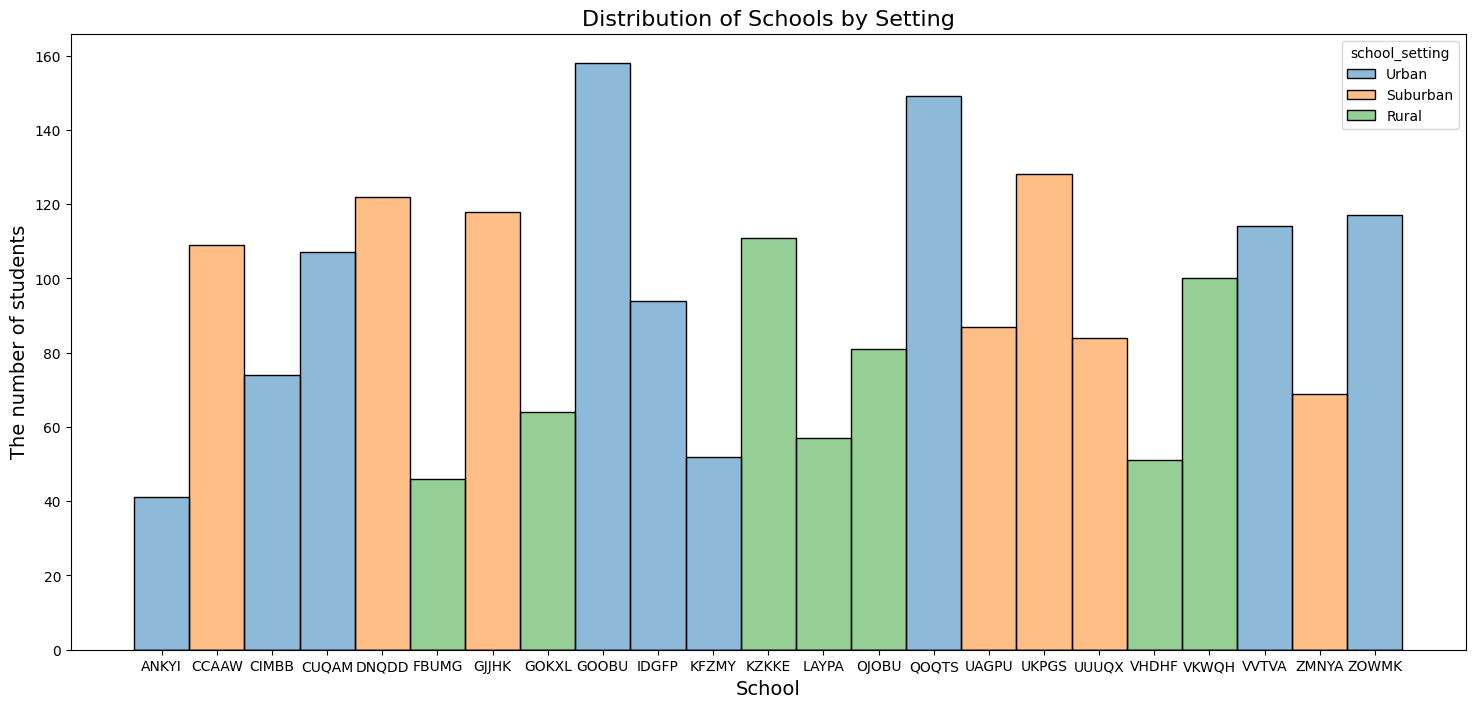

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='school_setting', ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('The number of students', fontsize=14)
ax.set_title('Distribution of Schools by Setting', fontsize=16)

# Display the plot
plt.show()

The chart shows the diversity in terms of school types, with urban schools being predominant. The majority of schools have a student count between 80 and 120. Two schools have more than 140 students. There are also schools with fewer than 60 students.

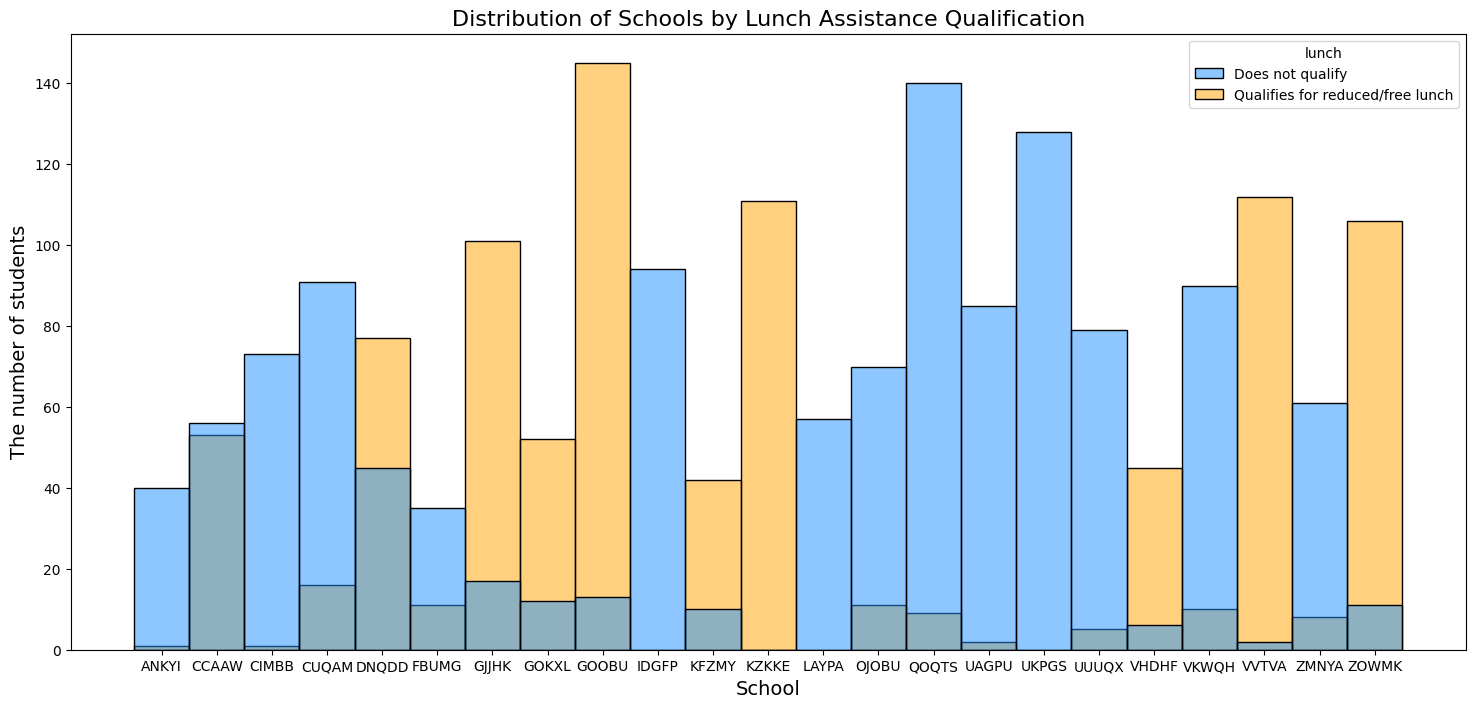

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='lunch', palette=['dodgerblue', 'orange'], ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('The number of students', fontsize=14)
ax.set_title('Distribution of Schools by Lunch Assistance Qualification', fontsize=16)

# Display the plot
plt.show()

We can see a variation among schools regarding the qualification of students for meals. In some schools, students who do not qualify for the lunch program are predominant. In other schools, there is a higher number of students qualifying for the lunch program.

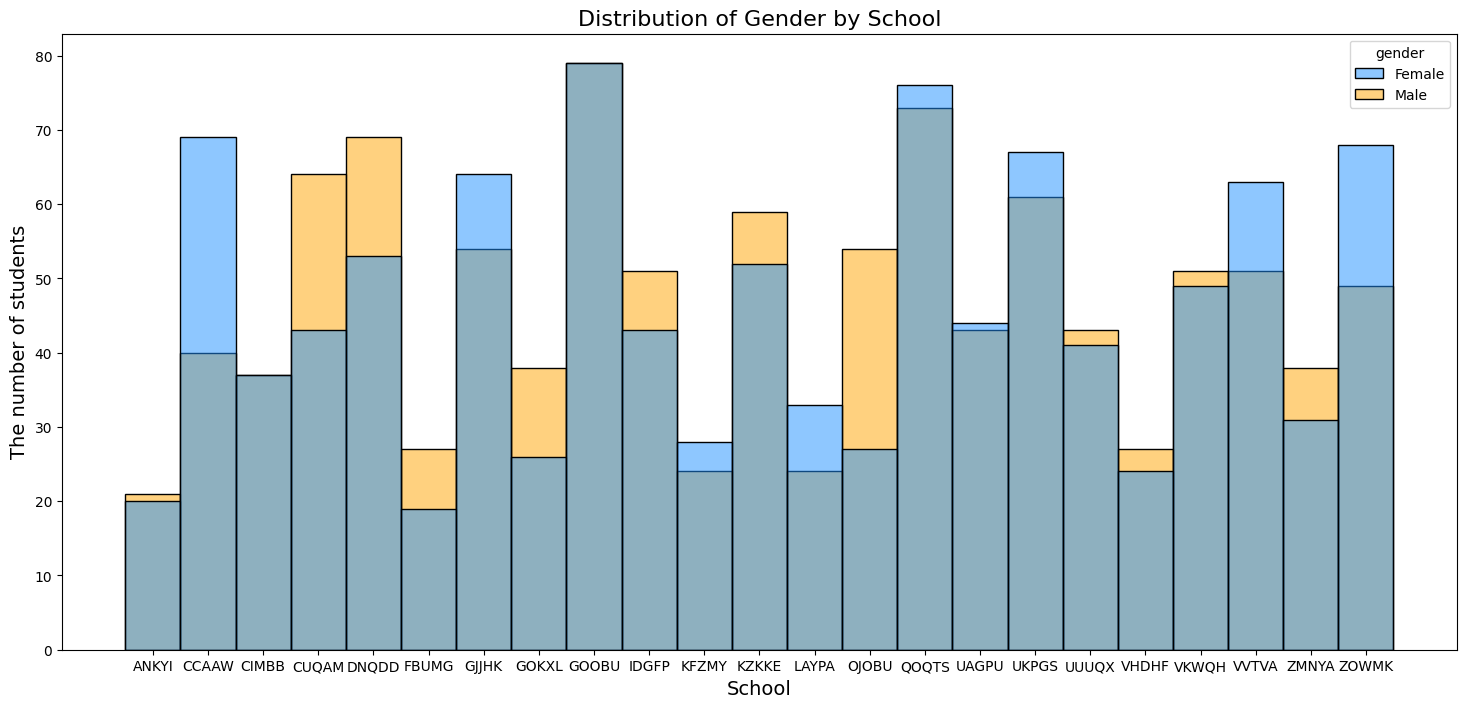

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='gender', palette=['dodgerblue', 'orange'], ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('The number of students', fontsize=14)
ax.set_title('Distribution of Gender by School', fontsize=16)

# Display the plot
plt.show()

In some schools, more men qualify for meals, while in others, it’s women.

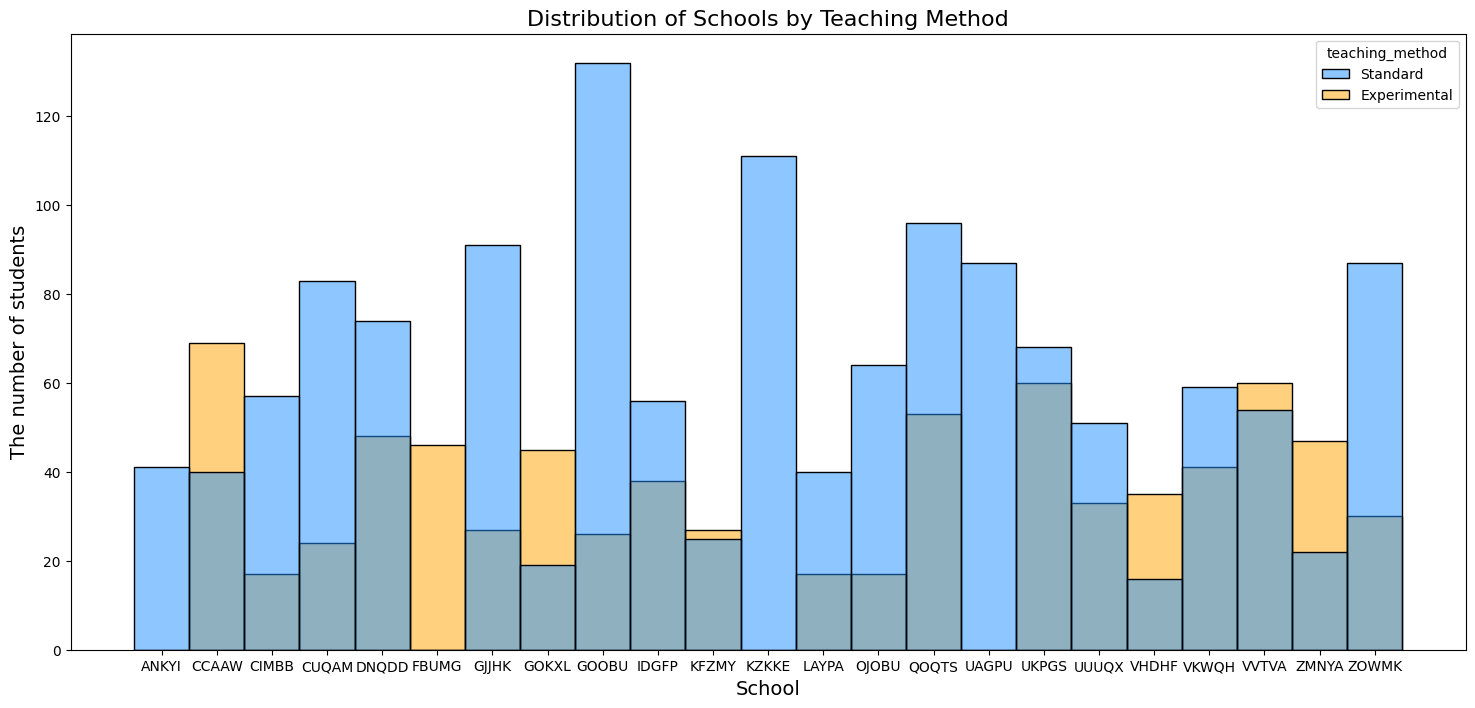

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='teaching_method', palette=['dodgerblue', 'orange'], ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('The number of students', fontsize=14)
ax.set_title('Distribution of Schools by Teaching Method', fontsize=16)

# Display the plot
plt.show()

In most schools, the standard method prevails. There are schools where various teaching methods are applied.








In [ ]:
teaching_method = test_scores.groupby(['school', 'classroom'])['teaching_method'].value_counts().reset_index()

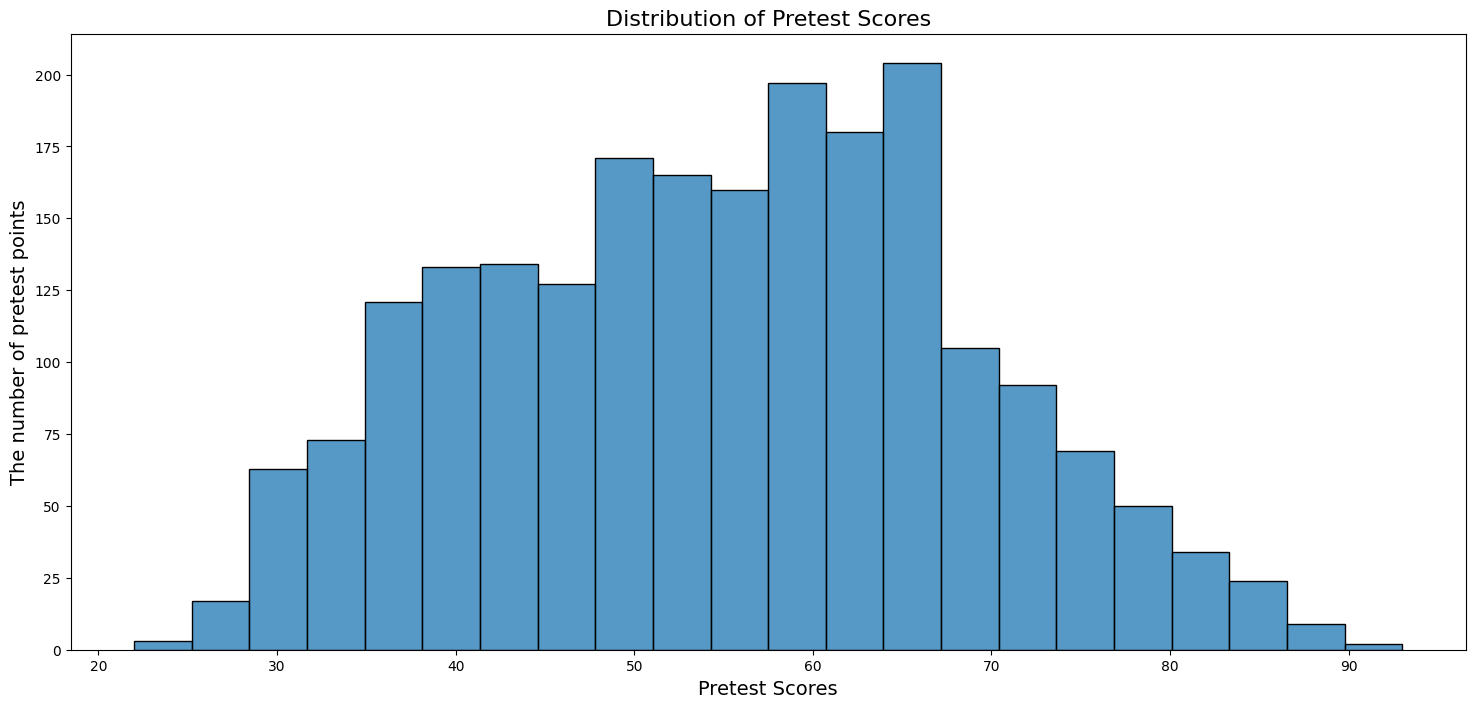

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='pretest', ax=ax)

# Add labels to the axes
ax.set_xlabel('Pretest Scores', fontsize=14)
ax.set_ylabel('The number of pretest points', fontsize=14)
ax.set_title('Distribution of Pretest Scores', fontsize=16)

# Display the plot
plt.show()

The pretest results range from above 20 points to around 100. The chart does not show a perfect normal distribution. The distribution appears to be slightly right-skewed. Let's check its Skewness

In [ ]:
print(f"""Skewness: {test_scores['pretest'].skew()}""")

Skewness: 0.04159728764160274


In [ ]:
shapiro_test = stats.shapiro(test_scores['pretest'])

shapiro_test

ShapiroResult(statistic=0.9897899066100283, pvalue=3.8031881571545314e-11)

Given that the p-value is extremely small (much less than 0.05), we can reject the null hypothesis that the data follows a normal distribution. This confirms that the distribution of time spent on courses is not normal.

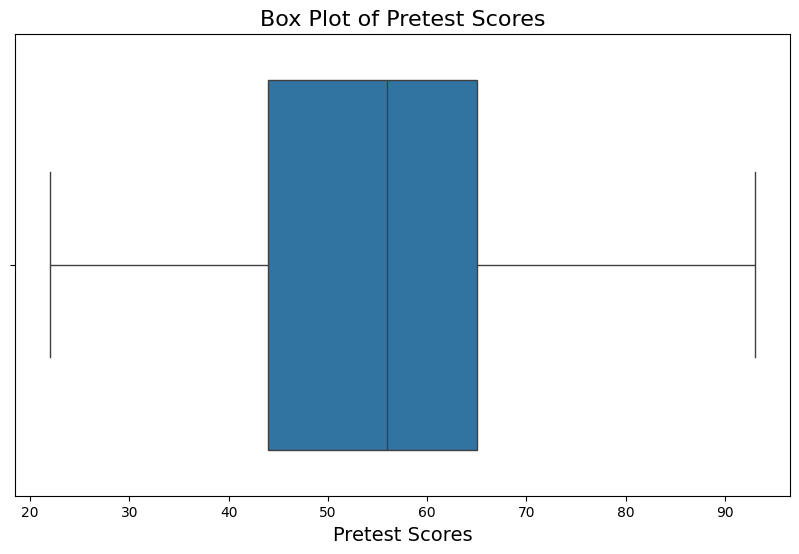

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=test_scores, x='pretest')


ax.set_xlabel('Pretest Scores', fontsize=14)
ax.set_title('Box Plot of Pretest Scores', fontsize=16)


plt.show()

There are no outliers in the pretest data

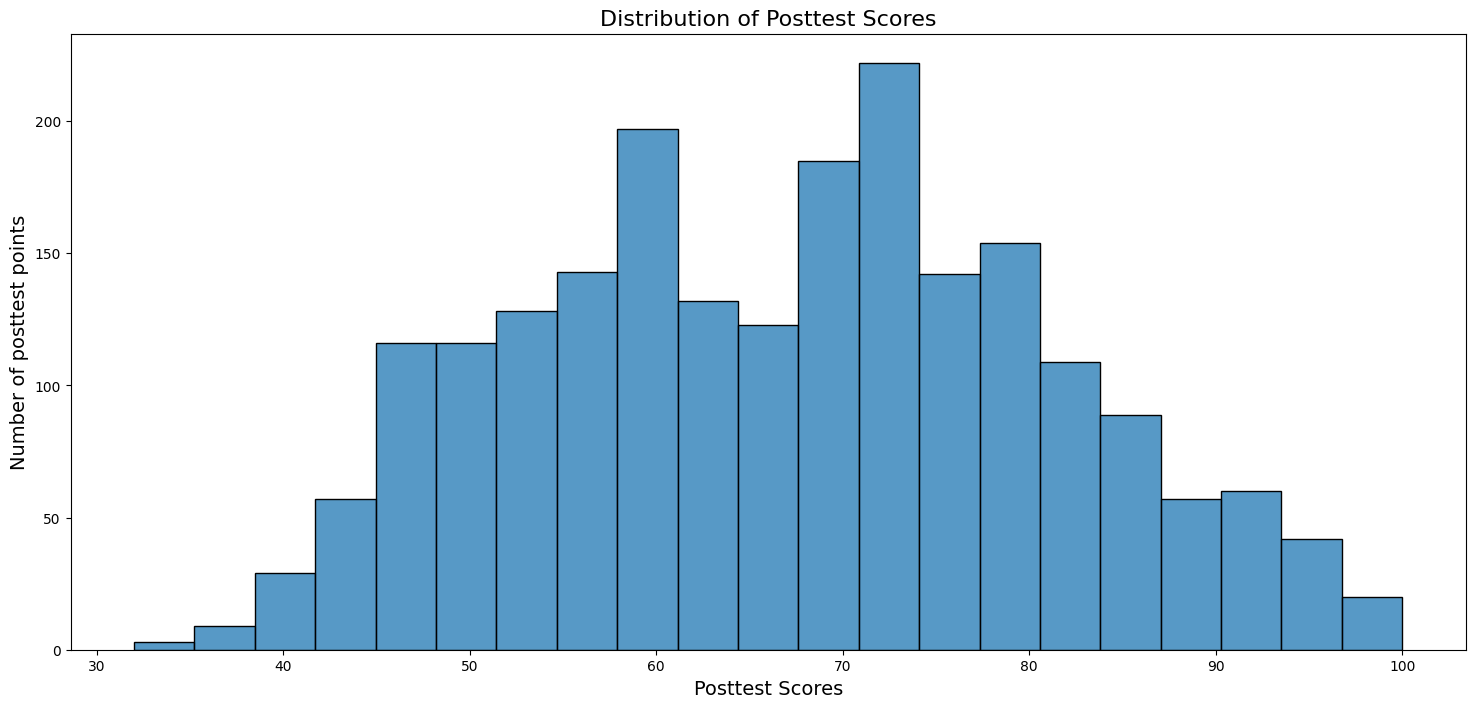

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='posttest', ax=ax)

# Add labels to the axes
ax.set_xlabel('Posttest Scores', fontsize=14)
ax.set_ylabel('Number of posttest points', fontsize=14)
ax.set_title('Distribution of Posttest Scores', fontsize=16)

# Display the plot
plt.show()

The posttest results range from above 20 points to around 100. The distribution appears to be slightly right-skewed.

In [ ]:
print(f"""Skewness: {test_scores['posttest'].skew()}""")

Skewness: 0.07309634150773381


In [ ]:
shapiro_test = stats.shapiro(test_scores['posttest'])

shapiro_test

ShapiroResult(statistic=0.9877533726565393, pvalue=1.563260139269286e-12)

We can also reject the null hypothesis that the data follows a normal distribution.

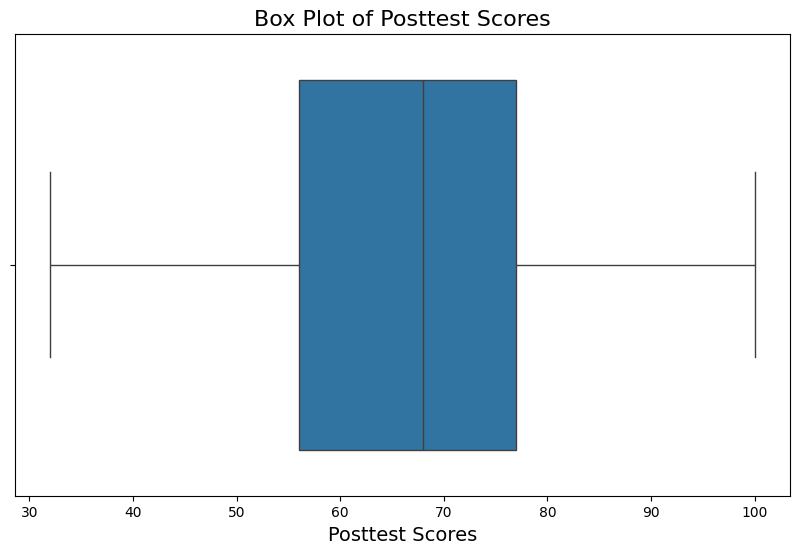

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=test_scores, x='posttest')


ax.set_xlabel('Posttest Scores', fontsize=14)
ax.set_title('Box Plot of Posttest Scores', fontsize=16)


plt.show()

There are no outliers in the posttest data

# Further analysis

In this section, we will conduct further data analysis. We will examine how school type, student gender, and teaching method influence pretest and posttest results.

Averaging posttest and pretest results, grouped by school and school type

In [ ]:
average_scores = test_scores.groupby(['school', 'school_type'])[['pretest', 'posttest']].mean().reset_index()

In [ ]:
best_pretest_schools = average_scores.sort_values(by='pretest', ascending=False)
best_posttest_schools = average_scores.sort_values(by='posttest', ascending=False)

In [ ]:
best_pretest_schools.head()

,school,school_type,pretest,posttest
16,UKPGS,Public,78.453125,91.164062
9,IDGFP,Non-public,75.202128,87.223404
21,ZMNYA,Public,68.130435,81.608696
17,UUUQX,Non-public,67.309524,79.261905
2,CIMBB,Non-public,65.067568,76.945946


The UKPGS school (Public) achieved the highest average pretest score (78.45). The next school, IDGFP (Non-public), also achieved a very high average pretest score (75.20). The top performers include both public and non-public schools, suggesting that a high level of student preparedness can occur regardless of the type of school. However, among the top ten schools, the majority are non-public.

In [ ]:
best_posttest_schools.head()

,school,school_type,pretest,posttest
16,UKPGS,Public,78.453125,91.164062
9,IDGFP,Non-public,75.202128,87.223404
21,ZMNYA,Public,68.130435,81.608696
17,UUUQX,Non-public,67.309524,79.261905
5,FBUMG,Non-public,62.891304,78.608696


The UKPGS school (Public) achieved the highest average posttest score (91.16), suggesting that students at this school significantly improved their results after the period of study. The IDGFP school (Non-public) also achieved a very high average posttest score (87.22). Once again, both public and non-public schools are among the top performers, indicating that a high level of teaching can be achieved regardless of the type of school. Similar to the pretest results, non-public schools also dominate the top ranks.

Averaging posttest and pretest results, grouped by school type

In [ ]:
average_type_school_scores = test_scores.groupby('school_type')[['pretest', 'posttest']].mean().reset_index()

In [ ]:
average_type_school_scores

,school_type,pretest,posttest
0,Non-public,63.254083,75.961887
1,Public,52.065740,64.016435


Non-public schools performed better on the test than public schools.

Averaging posttest and pretest results, grouped by gender and school type

In [ ]:
average_gender_scores = test_scores.groupby(['gender','school_type'])[['pretest', 'posttest']].mean().reset_index()

In [ ]:
average_gender_scores

,gender,school_type,pretest,posttest
0,Female,Non-public,63.263345,75.854093
1,Female,Public,51.830968,63.796129
2,Male,Non-public,63.244444,76.074074
3,Male,Public,52.291202,64.228005


Let’s check whether gender has an impact on the average pretest and posttest scores. To do this, we will perform a Student's t-test.

T-tests for pretest scores

In [ ]:
p_value_pretest_female = stats.ttest_ind(
    test_scores[(test_scores['gender'] == 'Female') & (test_scores['school_type'] == 'Public')]['pretest'],
    test_scores[(test_scores['gender'] == 'Female') & (test_scores['school_type'] == 'Non-public')]['pretest']
)[1]

p_value_pretest_male = stats.ttest_ind(
    test_scores[(test_scores['gender'] == 'Male') & (test_scores['school_type'] == 'Public')]['pretest'],
    test_scores[(test_scores['gender'] == 'Male') & (test_scores['school_type'] == 'Non-public')]['pretest']
)[1]

T-tests for posttest scores

In [ ]:
p_value_posttest_female = stats.ttest_ind(
    test_scores[(test_scores['gender'] == 'Female') & (test_scores['school_type'] == 'Public')]['posttest'],
    test_scores[(test_scores['gender'] == 'Female') & (test_scores['school_type'] == 'Non-public')]['posttest']
)[1]

p_value_posttest_male = stats.ttest_ind(
    test_scores[(test_scores['gender'] == 'Male') & (test_scores['school_type'] == 'Public')]['posttest'],
    test_scores[(test_scores['gender'] == 'Male') & (test_scores['school_type'] == 'Non-public')]['posttest']
)[1]


In [ ]:
# Display the results

In [ ]:
p_values = {
    "P-value Pretest (Female: Public vs Non-public)": p_value_pretest_female,
    "P-value Pretest (Male: Public vs Non-public)": p_value_pretest_male,
    "P-value Posttest (Female: Public vs Non-public)": p_value_posttest_female,
    "P-value Posttest (Male: Public vs Non-public)": p_value_posttest_male
}

p_values

{'P-value Pretest (Female: Public vs Non-public)': 1.8428800723074094e-34,
 'P-value Pretest (Male: Public vs Non-public)': 5.3725367830174286e-34,
 'P-value Posttest (Female: Public vs Non-public)': 5.183438207333911e-37,
 'P-value Posttest (Male: Public vs Non-public)': 1.6875215718405713e-36}

The p-values are smaller than the assumed significance level of 0.05. We conclude that the differences in student scores between public and private schools are statistically significant for both females and males at both testing stages (pretest and posttest).

Let’s examine the impact of the teaching method on test scores.

Averaging posttest and pretest results, grouped by teaching method

In [ ]:
average_teaching_method_scores = test_scores.groupby(['teaching_method'])[['pretest', 'posttest']].mean().reset_index()

In [ ]:
average_teaching_method_scores

,teaching_method,pretest,posttest
0,Experimental,57.055263,72.982895
1,Standard,53.793882,63.847050


T-test for pretest scores (Standard vs Experimental)

In [ ]:
p_value_pretest_method = stats.ttest_ind(
    test_scores[test_scores['teaching_method'] == 'Standard']['pretest'],
    test_scores[test_scores['teaching_method'] == 'Experimental']['pretest']
)[1]

T-test for posttest scores (Standard vs Experimental)

In [ ]:
p_value_posttest_method = stats.ttest_ind(
    test_scores[test_scores['teaching_method'] == 'Standard']['posttest'],
    test_scores[test_scores['teaching_method'] == 'Experimental']['posttest']
)[1]

In [ ]:
# Display the p-values

In [ ]:
teaching_method_p_values = {
    "P-value Pretest (Standard vs Experimental)": p_value_pretest_method,
    "P-value Posttest (Standard vs Experimental)": p_value_posttest_method
}

teaching_method_p_values

{'P-value Pretest (Standard vs Experimental)': 9.586506294420943e-08,
 'P-value Posttest (Standard vs Experimental)': 1.1640893397303954e-49}

The p-values are below the significance level. We conclude that the teaching method has a significant impact on the test scores.

## Data preparation for the model

In this section, we will prepare the data for modeling.

We create a new data frame without columns student_id. These variable will not be needed in the model.

In [ ]:
new_dataframe_reduced = test_scores.drop(columns=['student_id'])
new_dataframe_reduced.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0


Converting categorical variables into separate categories using OneHotEncoding method. One-hot encoding transforms a categorical column by creating *n* columns, where n is the number of unique values in the column. The number 1 is assigned to the appropriate column for each row, and 0 to the remaining columns that were generated for the categories

In [ ]:
categorical_columns = ['school', 'classroom', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
encoded_features = encoder.fit_transform(test_scores[categorical_columns])

In [ ]:
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

In [ ]:
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

In [ ]:
df_encoded = pd.concat([new_dataframe_reduced.drop(columns=categorical_columns), encoded_df], axis=1)

In [ ]:
df_encoded.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,20.0,66.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,20.0,64.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,20.0,61.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,20.0,64.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Normalization of continuous variables using MinMaxScaler in range 0 to 1

In [ ]:
columns_to_normalize = ['pretest', 'n_student']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

In [ ]:
df_encoded.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,0.352941,0.563380,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.352941,0.619718,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.352941,0.591549,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.352941,0.549296,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.352941,0.591549,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# Machine Learning Models




In this section, we will focus on data modeling using Machine Learning algorithms. First, we will split the data into training and testing sets. We will evaluate how the posttest results are predicted by the following models: Dummy Model Regressor, Linear Regression, SVM, and Decision Tree.

Splitting the dataset into a training set and a test set

In [ ]:
y = df_encoded.pop('posttest')
X = df_encoded

In [ ]:
y.shape

(2133,)

In [ ]:
X.shape

(2133, 133)

The data will be split into 80% for the training set and 20% for the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train.shape

(1706, 133)

In [ ]:
X_test.shape

(427, 133)

In [ ]:
y_train.shape

(1706,)

In [ ]:
y_test.shape

(427,)

## Dummy Regressor Model

Here’s a function definition that trains a model, makes predictions, and evaluates the results using both $R^{2}$ and MAE (Mean Absolute Error) for both the training and testing sets

In [ ]:
def train_and_evaluate(model, X_train=X_train, X_test=X_test):

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print('Value of R2 score on train set', r2_train)
    print('Value of R2 score on test set', r2_test)
    print('Value of Mean Absolute Error on train set', mae_train)
    print('Value of Mean Absolute Error on test set', mae_test)


Our first model will be Dummy Regressor

In [ ]:
dummy_regressor = DummyRegressor(strategy='mean')

In [ ]:
train_and_evaluate(dummy_regressor)

Value of R2 score on train set 0.0
Value of R2 score on test set -0.003829151001574882
Value of Mean Absolute Error on train set 11.599767182648923
Value of Mean Absolute Error on test set 11.939521896818228


We can see that the model did not perform well in making predictions. The ${R}^2$ score came out negative. The model did not fit the data. The model is off by 12 points.

## Linear Regression

Let's try the Linear Regression model

In [ ]:
model = LinearRegression()

In [ ]:
results = train_and_evaluate(model)

Value of R2 score on train set 0.961623942599424
Value of R2 score on test set 0.9616758317898689
Value of Mean Absolute Error on train set 2.145737928634232
Value of Mean Absolute Error on test set 2.2322251902810306


In the case of linear regression, the model is off by about 2.15 points on the training set and 2.23 points on test set.

Let’s see which variables have the greatest impact on the model. To do this, we will create a plot of the variable coefficients.

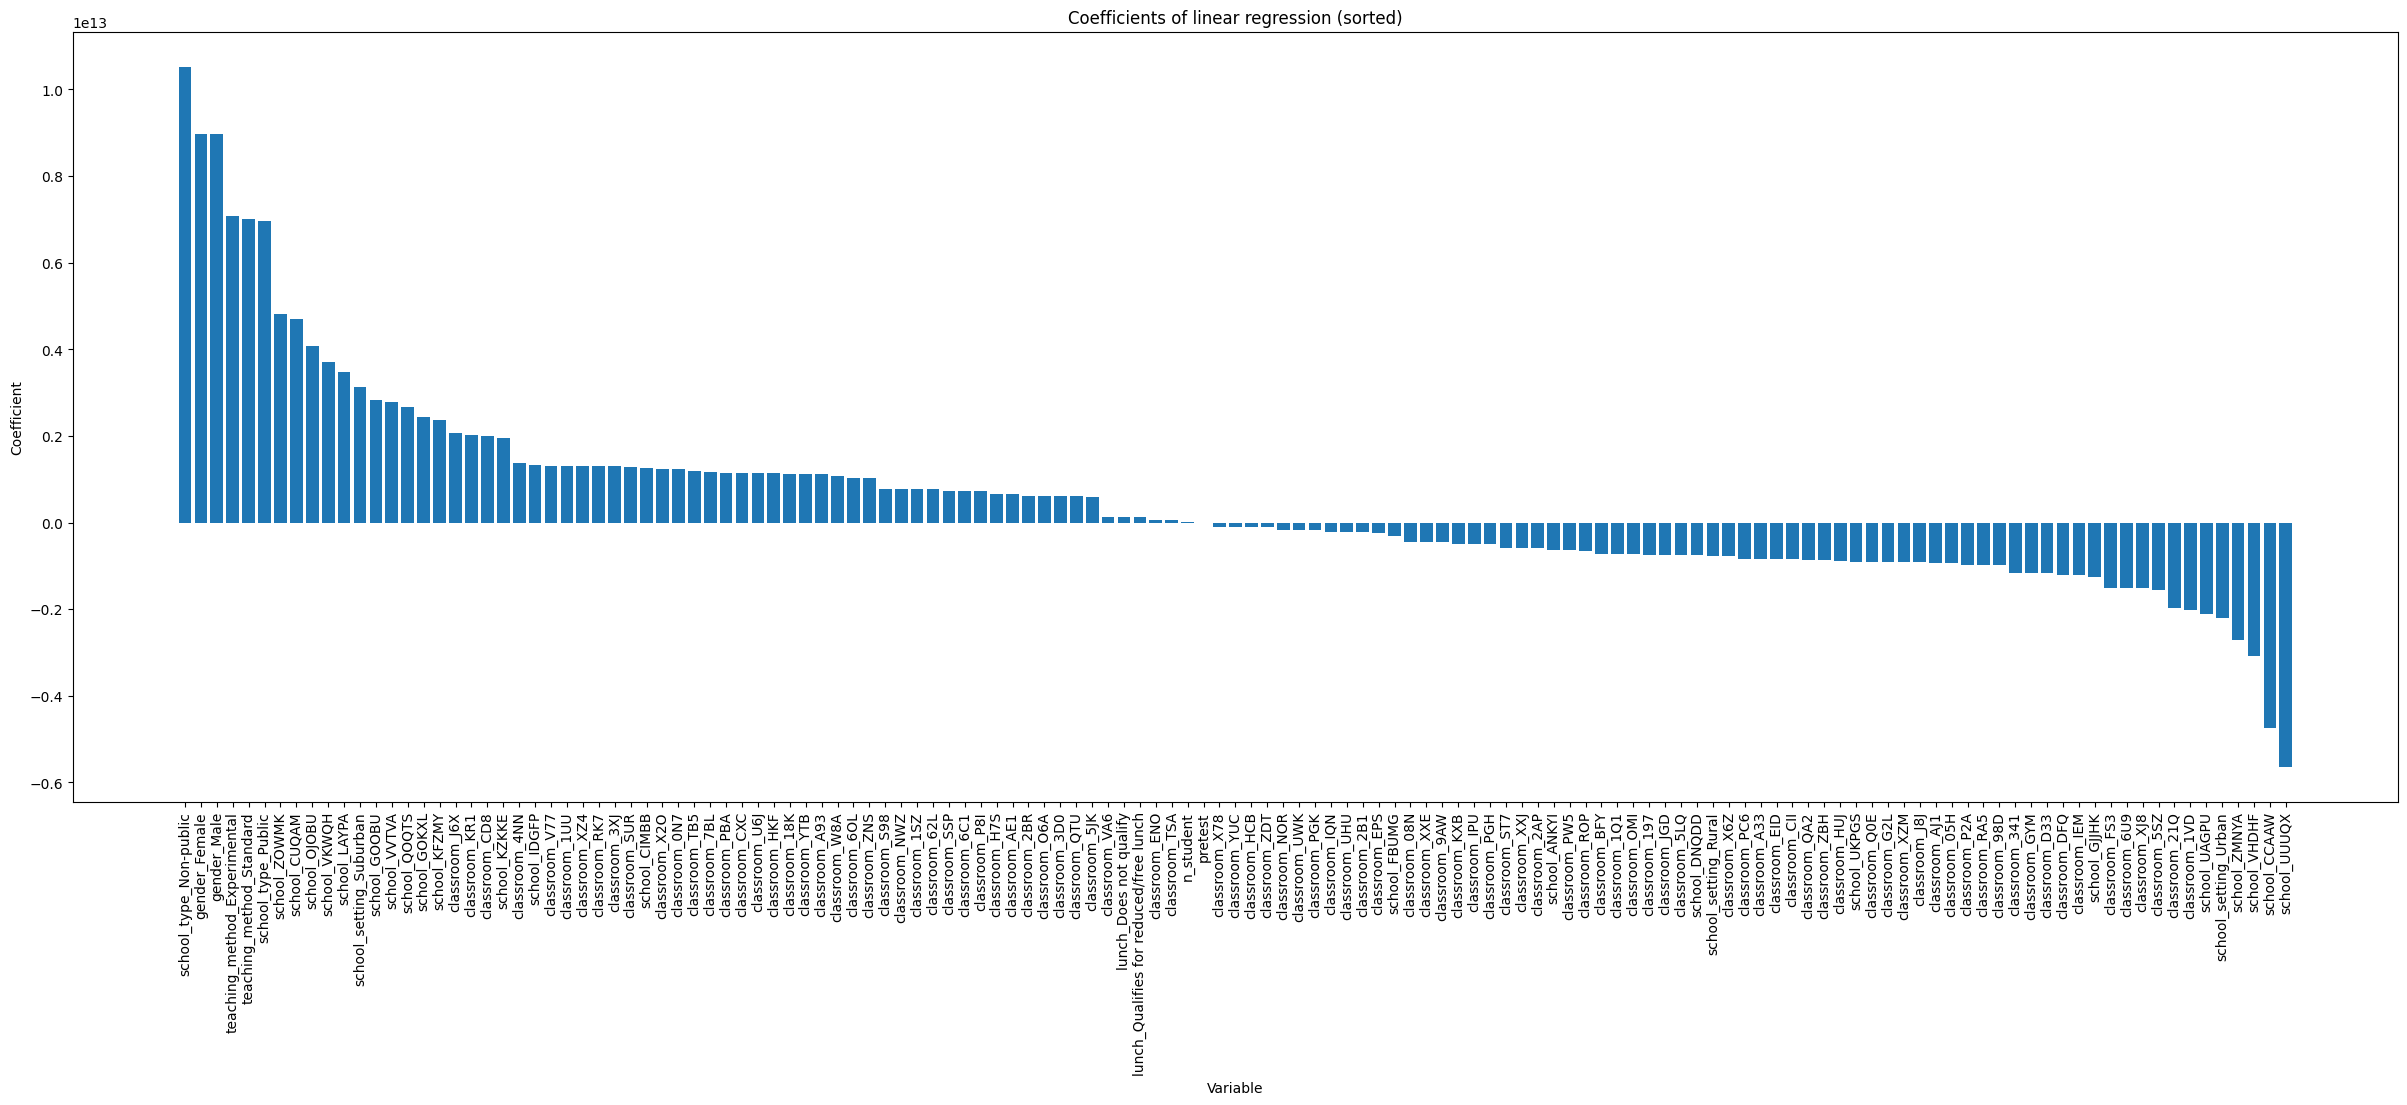

In [ ]:
coef = model.coef_

#Sorting variables by coefficient value
sorted_indices = coef.argsort()[::-1]
sorted_columns = X_train.columns[sorted_indices]
sorted_coef = coef[sorted_indices]

# Creating a plot
plt.figure(figsize=(30, 10))

# Visualization of coefficients
plt.bar(sorted_columns, sorted_coef)
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title("Coefficients of linear regression (sorted)")

# Displaying the plot
plt.xticks(rotation=90)
plt.show()

We can see that the model is most influenced by five variables: school_type_Non-public, gender-Female, gender-Male, school-CCAAW, school-UUUQX. The first three features have a positive impact on predicting test results, while the last two have a negative impact.

In [ ]:
y_test_pred = model.predict(X_test)
errors = y_test - y_test_pred

In [ ]:
np.var(errors)

7.829720012236584

In [ ]:
np.mean(y_test_pred) - np.mean(y_test)

-0.12297826405152534

Plotting the histogram of errors

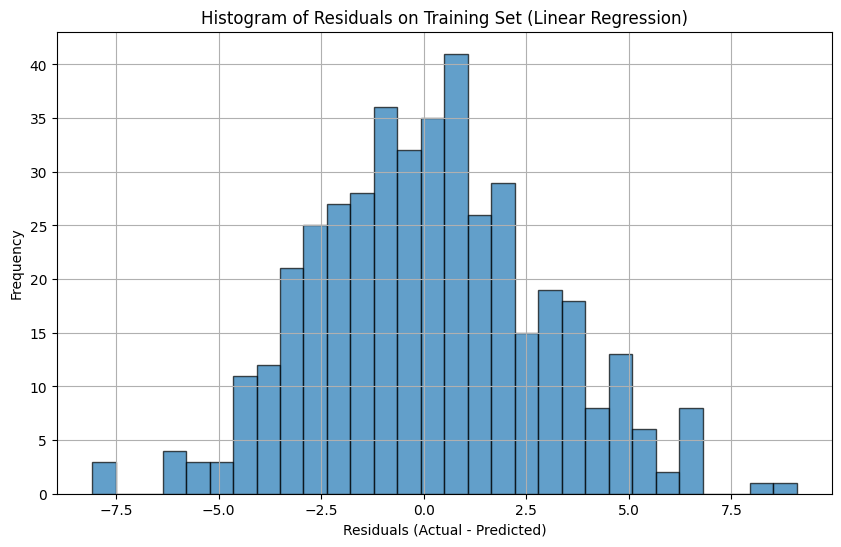

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals on Training Set (Linear Regression)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The errors are practically symmetrically distributed around zero. This indicates that the model does not have systematic tendencies to overestimate or underestimate. The distribution of errors is close to a normal distribution, which may suggest that the model fits the data well.

Plotting the actual and predicted score

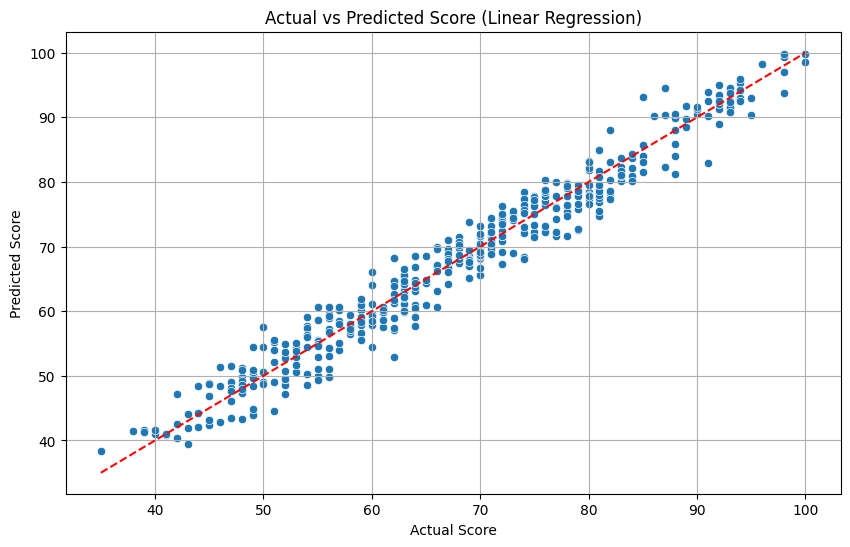

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Score (Linear Regression)')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.grid(True)
plt.show()

Most of the points are close to the red line, which may indicate that the model predicts the outcomes well. We also observe deviations around the 85-point mark.

In [ ]:
error_df = pd.DataFrame({"Score": y_test, 'Residuals': errors})

mae_per_score = error_df.groupby("Score").apply(lambda x: np.abs(x['Residuals']))
mae_per_score_sorted = mae_per_score.sort_values(ascending=False)
mae_per_score

Score      
35.0   746     3.410156
38.0   742     3.429688
39.0   1017    2.542969
       749     2.332031
40.0   761     1.011719
                 ...   
98.0   910     1.335938
       914     1.757812
       1487    4.300781
100.0  911     0.148438
       905     1.402344
Name: Residuals, Length: 427, dtype: float64

## Support Vector Machine Models



We will test SVM models with different kernels

The SVM model with RBF (Radial Basis Function) kernel

In [ ]:
svm_regressor = SVR()

In [ ]:
results_svr = train_and_evaluate(svm_regressor)

Value of R2 score on train set 0.9148819474613279
Value of R2 score on test set 0.9176619106658997
Value of Mean Absolute Error on train set 3.1336325588341785
Value of Mean Absolute Error on test set 3.267399568549086


We see that  the model is off by about 3.14 points on the training set and 3.27 points on test set.

The SVM model with linear kernel

In [ ]:
%%time
svm_regressor = SVR(kernel='linear')

train_and_evaluate(svm_regressor)

Value of R2 score on train set 0.9590406214937885
Value of R2 score on test set 0.9604495441079085
Value of Mean Absolute Error on train set 2.1630925083986603
Value of Mean Absolute Error on test set 2.2678503985937652
CPU times: user 754 ms, sys: 1.48 ms, total: 756 ms
Wall time: 784 ms


The model with linear kernel is off by about 2.16 points on the training set and 2.26 points on test set.

The SVM model with polynomial kernel degree 2

In [ ]:
svm_regressor = SVR(kernel='poly', degree=2)

train_and_evaluate(svm_regressor)

Value of R2 score on train set 0.9327088089276407
Value of R2 score on test set 0.9362623918985856
Value of Mean Absolute Error on train set 2.7880540956133726
Value of Mean Absolute Error on test set 2.8701527584957405


The model with polynomial kernel is off by about 2.79 points on the training set and 2.87 points on test set.


In the case of SVRMmodels, the SMV with linear kernel performed the best. The model is off by 2.26 points.

## Decision trees models

Let's see how the decision tree model performs with predictions. Here's how you can implement and evaluate a Decision Tree

In [ ]:
regr = DecisionTreeRegressor()
train_and_evaluate(regr)

Value of R2 score on train set 0.9895719239411165
Value of R2 score on test set 0.9287503473282248
Value of Mean Absolute Error on train set 0.7593200468933177
Value of Mean Absolute Error on test set 2.9896174863387976


We can see that the model achieved nearly 100% accuracy on the training data, while on the test set it scored 92%. From this, we can infer that the decision tree has overfitted to the training data.

Display the depth

In [ ]:
regr.get_depth()

22

Display the number of leaves

In [ ]:
regr.get_n_leaves()

1175

We will define models with a specified number of levels

In [ ]:
regr2 = DecisionTreeRegressor(max_depth=2)

train_and_evaluate(regr2)

Value of R2 score on train set 0.8302321636358055
Value of R2 score on test set 0.8176486709512584
Value of Mean Absolute Error on train set 4.619155063782814
Value of Mean Absolute Error on test set 4.971982709243777


In [ ]:
regr3 = DecisionTreeRegressor(max_depth=4)

train_and_evaluate(regr3)

Value of R2 score on train set 0.9302671942213004
Value of R2 score on test set 0.9330290520037854
Value of Mean Absolute Error on train set 2.904811184784885
Value of Mean Absolute Error on test set 2.9484712499518184


In [ ]:
regr4 = DecisionTreeRegressor(max_depth=6)

train_and_evaluate(regr4)

Value of R2 score on train set 0.9551855055520774
Value of R2 score on test set 0.9449610509131252
Value of Mean Absolute Error on train set 2.3147368081857476
Value of Mean Absolute Error on test set 2.6478851115582054


In [ ]:
regr5 = DecisionTreeRegressor(max_depth=10)

train_and_evaluate(regr5)

Value of R2 score on train set 0.9753792849381088
Value of R2 score on test set 0.9396106738344157
Value of Mean Absolute Error on train set 1.5692491872637164
Value of Mean Absolute Error on test set 2.8146775600585263


We can see that the model with a depth of 4 performed the best in making predictions

Visualize the decision tree

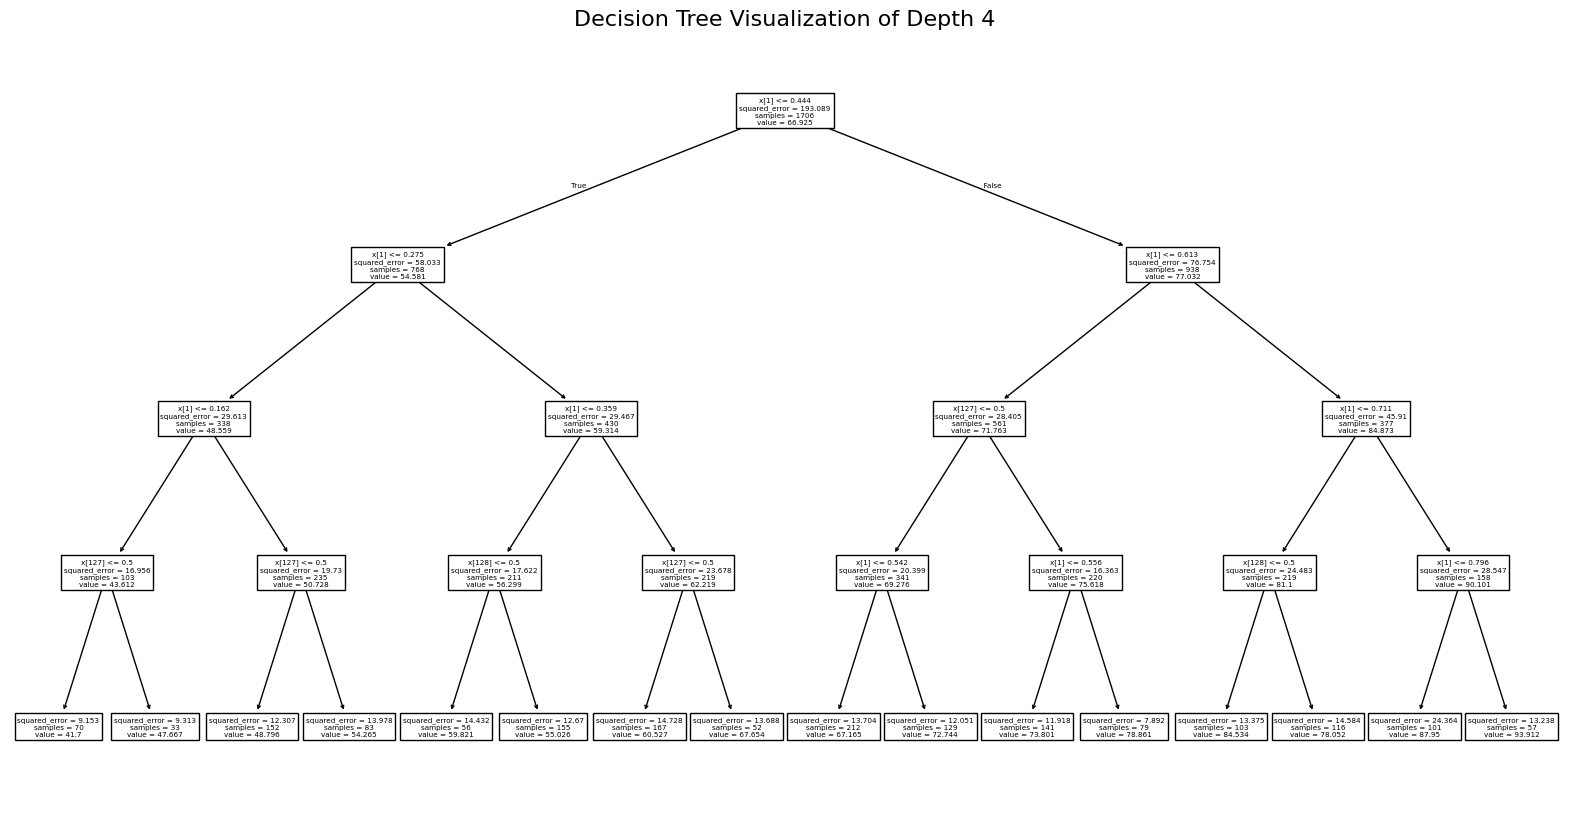

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(regr3)

# Adding axis labels
plt.xlabel('Tree Nodes', fontsize=14)
plt.ylabel('Tree Depth', fontsize=14)

# Adding a title to the plot
plt.title('Decision Tree Visualization of Depth 4', fontsize=16)

# Displaying the plot
plt.show()

Feature importances

In [ ]:
regr3.feature_importances_

array([0.        , 0.95745904, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
feat_imp = {X_train.columns[i]: regr3.feature_importances_[i] for i in range(len(X_train.columns))}

In [ ]:
feat_imp

{'n_student': 0.0,
 'pretest': 0.9574590367766764,
 'school_ANKYI': 0.0,
 'school_CCAAW': 0.0,
 'school_CIMBB': 0.0,
 'school_CUQAM': 0.0,
 'school_DNQDD': 0.0,
 'school_FBUMG': 0.0,
 'school_GJJHK': 0.0,
 'school_GOKXL': 0.0,
 'school_GOOBU': 0.0,
 'school_IDGFP': 0.0,
 'school_KFZMY': 0.0,
 'school_KZKKE': 0.0,
 'school_LAYPA': 0.0,
 'school_OJOBU': 0.0,
 'school_QOQTS': 0.0,
 'school_UAGPU': 0.0,
 'school_UKPGS': 0.0,
 'school_UUUQX': 0.0,
 'school_VHDHF': 0.0,
 'school_VKWQH': 0.0,
 'school_VVTVA': 0.0,
 'school_ZMNYA': 0.0,
 'school_ZOWMK': 0.0,
 'classroom_05H': 0.0,
 'classroom_08N': 0.0,
 'classroom_0N7': 0.0,
 'classroom_18K': 0.0,
 'classroom_197': 0.0,
 'classroom_1Q1': 0.0,
 'classroom_1SZ': 0.0,
 'classroom_1UU': 0.0,
 'classroom_1VD': 0.0,
 'classroom_21Q': 0.0,
 'classroom_2AP': 0.0,
 'classroom_2B1': 0.0,
 'classroom_2BR': 0.0,
 'classroom_341': 0.0,
 'classroom_3D0': 0.0,
 'classroom_3XJ': 0.0,
 'classroom_4NN': 0.0,
 'classroom_5JK': 0.0,
 'classroom_5LQ': 0.0,
 'clas

We can see that only 3 features are important for the model: pretest, teaching_method_Experimental and teaching_method_Standard. In the case of decision trees, the best result was achieved by a tree with a depth of 4. In this case, the model is off by about 3 points.

# Summary
In this project, I have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, I performed data preprocessing and feature engineering. Finally, We train linear regression model, Support Vector MAchines models, Decission Tree models. The best model turned out to be Linear Regression model with MAE 2,23